In [2]:
##Simulate random data for the spot & futures prices
##(replace this with spot & futures data)

In [3]:
import StatsKit
import CSV

In [33]:
import StatsPlots
import DataFrames

In [34]:
using GLM 

In [38]:
futures = CSV.read("futures_data.csv")

,Date,HO-Futures
,String,Float64
1,6/2/1986,0.378
2,6/3/1986,0.38
3,6/4/1986,0.358
4,6/5/1986,0.374
5,6/6/1986,0.372
6,6/9/1986,0.366
7,6/10/1986,0.36
8,6/11/1986,0.384
9,6/12/1986,0.394


In [39]:
spot = CSV.read("HO-Spot.csv")

,Date,HO-Spot
,String,Float64
1,6/2/1986,0.402
2,6/3/1986,0.393
3,6/4/1986,0.378
4,6/5/1986,0.39
5,6/6/1986,0.385
6,6/9/1986,0.373
7,6/10/1986,0.365
8,6/11/1986,0.389
9,6/12/1986,0.394


In [40]:
futures

,Date,HO-Futures
,String,Float64
1,6/2/1986,0.378
2,6/3/1986,0.38
3,6/4/1986,0.358
4,6/5/1986,0.374
5,6/6/1986,0.372
6,6/9/1986,0.366
7,6/10/1986,0.36
8,6/11/1986,0.384
9,6/12/1986,0.394


In [41]:
df = join(spot, futures, kind=:inner, on=:Date)

,Date,HO-Spot,HO-Futures
,String,Float64,Float64
1,6/2/1986,0.402,0.378
2,6/3/1986,0.393,0.38
3,6/4/1986,0.378,0.358
4,6/5/1986,0.39,0.374
5,6/6/1986,0.385,0.372
6,6/9/1986,0.373,0.366
7,6/10/1986,0.365,0.36
8,6/11/1986,0.389,0.384
9,6/12/1986,0.394,0.394


In [43]:
DataFrames.rename!(df, [:date,:spot,:futures])

,date,spot,futures
,String,Float64,Float64
1,6/2/1986,0.402,0.378
2,6/3/1986,0.393,0.38
3,6/4/1986,0.378,0.358
4,6/5/1986,0.39,0.374
5,6/6/1986,0.385,0.372
6,6/9/1986,0.373,0.366
7,6/10/1986,0.365,0.36
8,6/11/1986,0.389,0.384
9,6/12/1986,0.394,0.394


In [11]:
#n = 500;
#spot = cumsum(randn(n));
#α = .25
#β = 2.46
#σ = 2.0
#z = randn(n) * σ
#futures = α .+ β .* spot .+ z;

In [12]:
fobs = 8470
sobs = 8497

8497

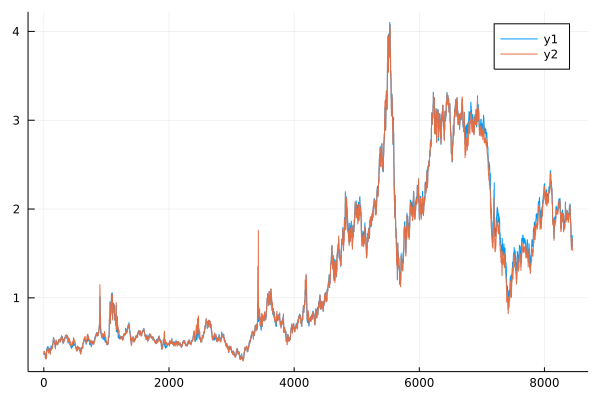

In [45]:
StatsPlots.plot(df["futures"])
StatsPlots.plot!(df["spot"])

In [54]:
ΔS = diff(df["spot"])
ΔF = diff(df["futures"]);

In [51]:
ΔS;

In [50]:
ΔF;

In [17]:
X = ones(fobs-1,2)
X[:,2] .= ΔF
y = ones(sobs-1,2)
y[:,2] .= ΔS

LoadError: UndefVarError: ΔF not defined

In [55]:
#coefs = StatsKit.MultivariateStats.llsq(ΔF, ΔS; bias=false)
#coefs[2]
#GLM.lm(@formula(spot ~ futures),df[1:60,:])

In [82]:
M = 25
hedgeratios = zeros(M)
ibeg = 61
iend = 121
ii = 1
step = 30

for i=1:step:(step*M)
    model = GLM.lm(@formula(spot ~ futures), df[ibeg:iend, :])
    hedgeratios[ii] = coef(model)[2]
    ibeg += step
    iend += step
    ii += 1
end

In [80]:
model = GLM.lm(@formula(spot ~ futures), df[1:60, :])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

spot ~ 1 + futures

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.044306   0.0104833   4.23    <1e-04  0.0233214  0.0652907
futures      0.875631   0.0279238  31.36    <1e-37  0.819735   0.931526
────────────────────────────────────────────────────────────────────────

In [81]:
coef(model)[2]

0.8756307867830835

In [66]:
#test = 61
#nest = 121

#hest = GLM.lm(@formula(spot ~ futures),df[test:nest,:])


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

spot ~ 1 + futures

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00574537   0.0100454   0.57    0.5695  -0.0143554  0.0258462
futures      0.954305     0.0239767  39.80    <1e-43   0.906327   1.00228
───────────────────────────────────────────────────────────────────────────

In [88]:
#hest;

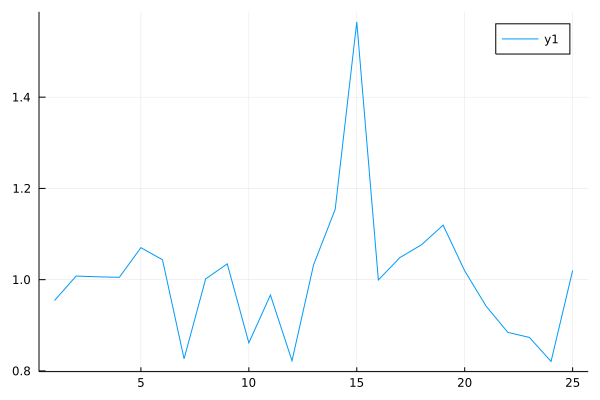

In [83]:
StatsPlots.plot(hedgeratios)

In [87]:
hedgeratios[1:25]

25-element Vector{Float64}:
 0.9543045478615719
 1.0079536636736794
 1.006227591838438
 1.0051341559834994
 1.0701171247648895
 1.0436302949648875
 0.826646449248349
 1.0017104033215376
 1.0347114712853678
 0.8614958232288107
 0.9663263653419821
 0.8222751661118903
 1.032695175780267
 1.1541617530408175
 1.564744549938692
 0.999368037388585
 1.0485770967869794
 1.0765595059828876
 1.1195643658888526
 1.0192231999086778
 0.9413399774710353
 0.8843775141842269
 0.8733034720173548
 0.8208043452175107
 1.0201097639849093

In [108]:
df["spot"]

8446-element Vector{Float64}:
 0.402
 0.393
 0.378
 0.39
 0.385
 0.373
 0.365
 0.389
 0.394
 0.398
 0.379
 0.374
 0.376
 ⋮
 1.612
 1.581
 1.647
 1.651
 1.669
 1.669
 1.644
 1.667
 1.657
 1.65
 1.575
 1.529

In [102]:
using DataFrames
logdf = DataFrame(logspot = log.(df["spot"]), logfutures = log.(df["futures"]))

,logspot,logfutures
,Float64,Float64
1,-0.911303,-0.972861
2,-0.933946,-0.967584
3,-0.972861,-1.02722
4,-0.941609,-0.983499
5,-0.954512,-0.988861
6,-0.986177,-1.00512
7,-1.00786,-1.02165
8,-0.944176,-0.957113
9,-0.931404,-0.931404


In [92]:
ΔLS = diff(Logspot);
ΔLF = diff(Logfutures);

In [24]:
X = ones(fobs-1,2)
X[:,2] .= ΔLF
y = ones(sobs-1,2)
y[:,2] .= ΔLS

LoadError: UndefVarError: ΔLF not defined

In [106]:
M = 25
loghedgeratios = zeros(M)
ibeg = 61
iend = 121
ii = 1
step = 30

for i=1:step:(step*M)
    model = GLM.lm(@formula(logspot ~ logfutures), logdf[ibeg:iend, :])
    loghedgeratios[ii] = coef(model)[2]
    ibeg += step
    iend += step
    ii += 1
end

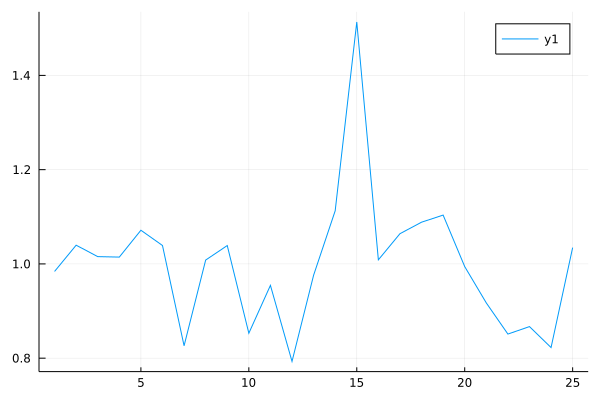

In [107]:
StatsPlots.plot(loghedgeratios)

In [105]:
loghedgeratios[1:25]


25-element Vector{Float64}:
 0.9840222065738958
 1.0397159892700127
 1.0154810509164105
 1.0144820611759853
 1.071450746733292
 1.0390520032233037
 0.8262558129444387
 1.008158947171015
 1.0389798882185763
 0.8529130715149885
 0.9545111438170445
 0.7930940225486957
 0.9759771251329987
 1.1127055962233996
 1.513311340816434
 1.0086644562199367
 1.0641292739099566
 1.088541056801591
 1.103601393228519
 0.9943182204566321
 0.9172221754066752
 0.851177851051999
 0.8670064226709917
 0.8225552950956573
 1.0346110704942901

In [29]:
StatsPlots.plot(futures[2])
StatsPlots.plot!(spot[2])

LoadError: UndefVarError: futures not defined

In [30]:
futures[:2]

LoadError: UndefVarError: futures not defined

In [84]:
GLM.lm(@formula(spot ~ futures),df[61:121,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

spot ~ 1 + futures

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00574537   0.0100454   0.57    0.5695  -0.0143554  0.0258462
futures      0.954305     0.0239767  39.80    <1e-43   0.906327   1.00228
───────────────────────────────────────────────────────────────────────────

In [32]:
testpush=1


1